### Domain Background

In a service industry time plays a big factor. The amount of time worked on a Client project translates into cost and revenue. Projects are created in the system to track time,cost and budget. Typically when a new project is created budget is allocated to it. The budget is what a Client will pay to do the work. Users get assigned to the project so he/she can log time worked on different tasks. This time gets converted to cost and compared with the budget

### Problem Statement

The assumption/ hypothesis is that if the cost is less than or equal to the budget then the project is efficiently managed else it is not efficiently managed.Understanding what factors influence a project to go over budget and the likeliness of a project to go over budget will help an organization make better business decisions.

In [1]:
import pandas as pd
data17 = pd.read_csv ('data17_modified.csv')

### Exploratory analysis

In this paper I will analyse projects and the associated meta data to the projects to find any trend/ patterns that will explain when a project has the potential to go over budget.  The features include the following. The Target variable is binary i.e Project went over budget yes/ no.


- Count of different departments/disciplines involved in the project
- Total hours worked by senior level management in the project
- Total hours worked by mid level management in the project 
- Total hours worked by Junior level employees in the project
- Count of different offices involved in the project
- Total Number of Holidays taken by team members during the Project
- Total duration of the project
- Number of additional projects thatthe team is assigned to during the project duration
- Count of different service offering tagged to a project
- Project went overbudget yes/ no - 1=yes, 0=no



In [2]:
from IPython.display import display

#display the first 20 records
display(data17.head(n=20))



,JobCode,deptcount,srhrs,midhrs,jrhrs,officecount,ptodays,pjduration,additionalassignments,teamsize,projtags,overbudget
0,N8570,3,27.00,0.0,0.0,1,0,11,7,3,4,0
1,I9510H,4,55.00,0.0,0.0,2,14,50,16,5,4,1
2,10834251,2,1.00,0.0,0.0,2,21,78,66,4,5,0
3,10850090,8,1298.75,0.0,0.0,2,75,91,66,11,5,0
4,10803999,1,22.00,0.0,0.0,1,1,73,39,3,5,1
5,10811560,1,8.00,0.0,0.0,1,1,14,8,1,4,0
6,10821006,3,13.00,0.0,0.0,1,4,16,6,5,6,1
7,10855446,2,69.00,0.0,0.0,1,16,137,31,3,5,1
8,10847933,2,30.00,0.0,0.0,1,6,91,36,3,5,0
9,10892841,2,30.00,0.0,0.0,1,2,8,5,2,5,1


#### Step 1  - to get an overview and examine target variable
1. The total number of records - 1708
2. Total number of features -10
3. Number of projects over budget -857
4. % of project over budget -50.17%


In [3]:
# total number of records

n_records = len(data17)
n_column = len(data17.columns)-2
overbdg = len(data17[data17.overbudget==1])

print ("Total number of records:",n_records)
print ("Total number of feature:",n_column)
print ("Number of project overbudget:", overbdg)
print ("% of project overbudget: ",(overbdg/n_records)*100.0)
print ("year: 2017")



Total number of records: 1708
Total number of feature: 10
Number of project overbudget: 857
% of project overbudget:  50.17564402810304
year: 2017


#### Step 2 - Get summary statistics for all the features in the data set

In [4]:
# Display a description of the dataset
display(data17.describe())

,deptcount,srhrs,midhrs,jrhrs,officecount,ptodays,pjduration,additionalassignments,teamsize,projtags,overbudget
count,1708.00000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000
mean,5.02459,198.761856,276.476434,170.590896,1.761124,92.726581,105.699063,187.086066,13.758782,6.340164,0.501756
std,2.39299,467.643146,676.195382,505.779553,1.025321,162.748445,92.353538,232.795158,11.030676,2.652868,0.500143
min,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000
25%,3.00000,6.500000,20.000000,4.000000,1.000000,11.000000,43.750000,47.000000,6.000000,4.000000,0.000000
50%,5.00000,52.000000,85.250000,43.000000,1.000000,38.000000,78.000000,110.000000,11.000000,6.000000,1.000000
75%,7.00000,190.000000,284.750000,159.625000,2.000000,111.000000,141.000000,245.250000,18.000000,8.000000,1.000000
max,14.00000,7114.750000,14112.750000,11606.000000,8.000000,2513.000000,792.000000,3056.000000,108.000000,23.000000,1.000000


In [5]:
import numpy as np

print ("Median of deptcount:", np.median(data17['deptcount']))
print ("Median of srhrs:",np.median(data17['srhrs']))
print ("Median of midhrs:",np.median(data17['midhrs']))
print ("Median of jrhrs:",np.median(data17['jrhrs']))
print ("Median of officecount:",np.median(data17['officecount']))
print ("Median of ptodays:",np.median(data17['ptodays']))
print ("Median of pjduration:", np.median(data17['pjduration']))
print ("Median of additionalassignments:", np.median(data17['additionalassignments']))
print ("Median of teamsize:", np.median(data17['teamsize']))
print ("Median of projtags:", np.median(data17['projtags']))

   




Median of deptcount: 5.0
Median of srhrs: 52.0
Median of midhrs: 85.25
Median of jrhrs: 43.0
Median of officecount: 1.0
Median of ptodays: 38.0
Median of pjduration: 78.0
Median of additionalassignments: 110.0
Median of teamsize: 11.0
Median of projtags: 6.0


In [6]:
# Split the data into features and target label
overbudget = data17['overbudget']
features_raw = data17.drop('overbudget', axis = 1)

 

#### Step 3 - Evaluate the distribution of each feature




In [7]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score


def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (18,6));

    # Skewed feature plotting
    for i, feature in enumerate(['srhrs','midhrs','jrhrs']):
        ax = fig.add_subplot(1, 3, i+1)
        ax.hist(data[feature], bins = 50, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 600))
        ax.set_yticks([0, 50, 100, 200, 400,600])
        ax.set_yticklabels([0, 50,100,200, 400,">600"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features",fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Data Features", fontsize = 14, y = 1.03)

    fig.tight_layout()
    fig.show()
    
def distribution2(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (15,4));

    # Skewed feature plotting
    for i, feature in enumerate(['ptodays','pjduration','additionalassignments','teamsize']):
        ax = fig.add_subplot(1, 4, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 600))
        ax.set_yticks([0, 50, 100, 200, 400,600])
        ax.set_yticklabels([0, 50,100,200, 400,">600"])
        

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features",fontsize = 14, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Data Features", fontsize = 14, y = 1.03)

    fig.tight_layout()
    fig.show()
    
def distribution3(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = pl.figure(figsize = (17,4));

    # Skewed feature plotting
    for i, feature in enumerate(['deptcount','officecount','projtags']):
        ax = fig.add_subplot(1, 3, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 600))
        ax.set_yticks([0, 50, 100, 200, 400,600])
        ax.set_yticklabels([0, 50,100,200, 400,">600"])
        

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Census Data Features",fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Data Features", fontsize = 14, y = 1.03)

    fig.tight_layout()
    fig.show()
    
    
    


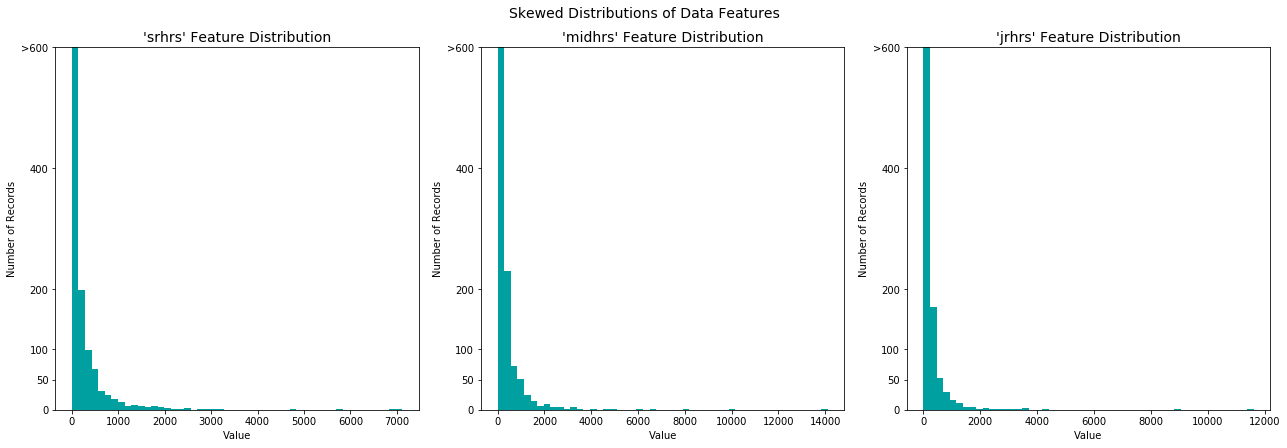

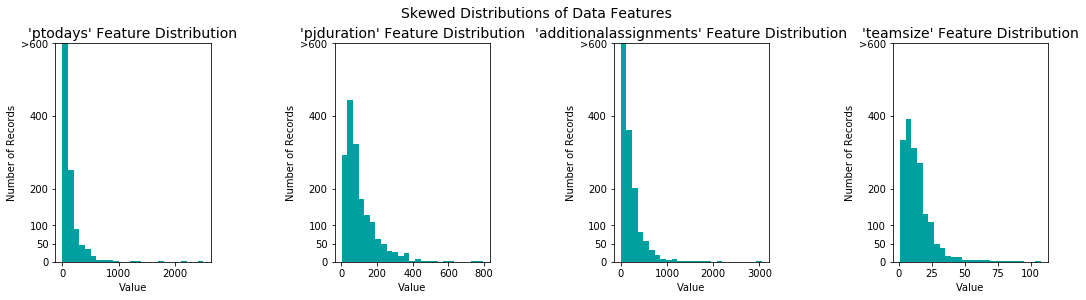

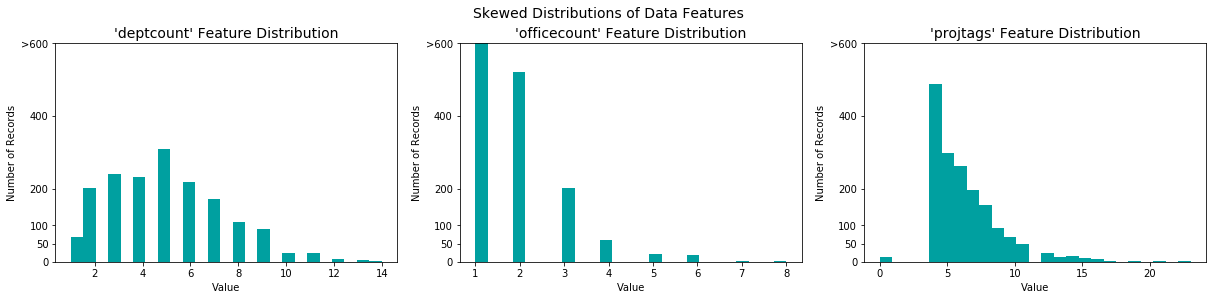

In [8]:
distribution(data17)

distribution2(data17)

distribution3(data17)

##### Looking at the distribution and comparing mean vs median, it can be confirmed that all the features are positively/ right skewed

#### Step 4: Transform the positively skewed distribution to normal distribution by applying natural log

In [9]:
# Log-transform the skewed features
skewed = ['srhrs','midhrs','jrhrs','ptodays','pjduration','additionalassignments','teamsize','projtags','deptcount']
features_raw[skewed] = data17[skewed].apply(lambda x: np.log(x + 1))



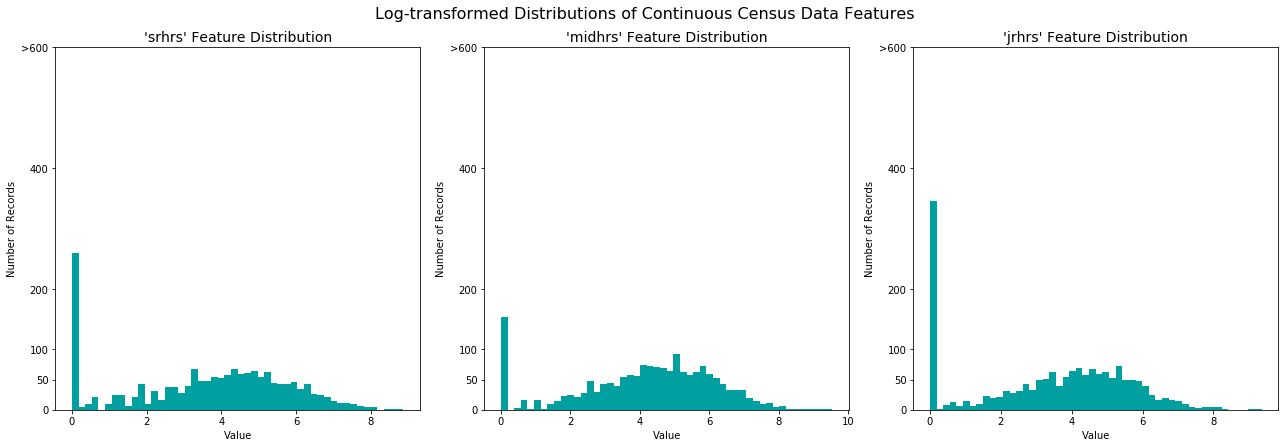

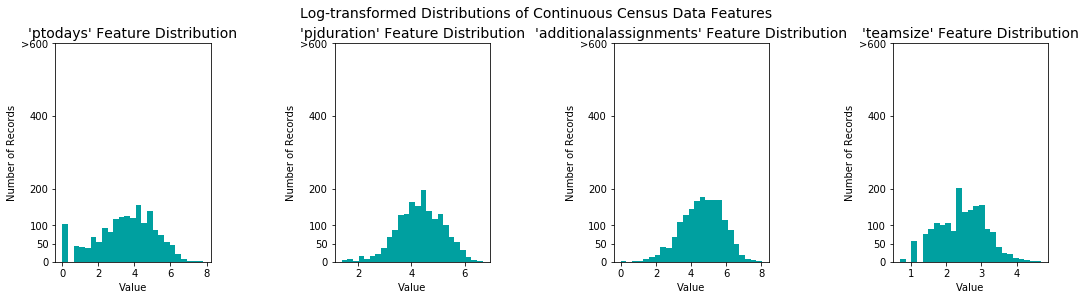

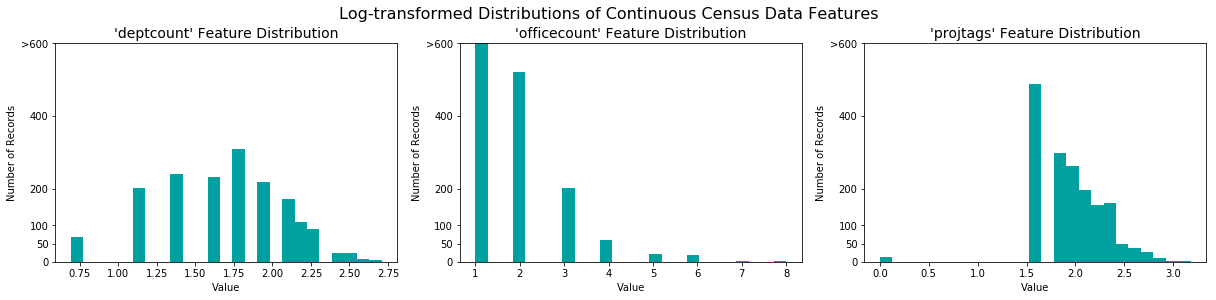

In [10]:
# Visualize the new log distributions
distribution(features_raw, transformed = True)

# Visualize the new log distributions
distribution2(features_raw, transformed = True)

# Visualize the new log distributions
distribution3(features_raw, transformed = True)


#### Step 5: Is to scale the features so that learners will treat all the features euqally. 


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['srhrs','midhrs','jrhrs','ptodays','pjduration','additionalassignments','teamsize','deptcount','officecount','projtags']
features_raw[numerical] = scaler.fit_transform(features_raw[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 10))


,JobCode,deptcount,srhrs,midhrs,jrhrs,officecount,ptodays,pjduration,additionalassignments,teamsize,projtags
0,N8570,0.344010,0.375669,0.0,0.0,0.000000,0.000000,0.207696,0.259114,0.173365,0.506422
1,I9510H,0.454757,0.453813,0.0,0.0,0.142857,0.345872,0.481240,0.353040,0.274777,0.506422
2,10834251,0.201233,0.078145,0.0,0.0,0.142857,0.394788,0.563973,0.523937,0.229176,0.563791
3,10850090,0.746476,0.808329,0.0,0.0,0.142857,0.553121,0.592774,0.523937,0.448141,0.563791
4,10803999,0.000000,0.353492,0.0,0.0,0.000000,0.088529,0.551613,0.459663,0.173365,0.563791
5,10811560,0.000000,0.247712,0.0,0.0,0.000000,0.088529,0.249882,0.273791,0.000000,0.506422
6,10821006,0.344010,0.297524,0.0,0.0,0.000000,0.205557,0.273544,0.242475,0.274777,0.612296
7,10855446,0.201233,0.478970,0.0,0.0,0.000000,0.361858,0.669428,0.431857,0.173365,0.563791
8,10847933,0.201233,0.387143,0.0,0.0,0.000000,0.248532,0.592774,0.449948,0.173365,0.563791
9,10892841,0.201233,0.387143,0.0,0.0,0.000000,0.140315,0.153309,0.223267,0.101412,0.563791


#### Step 6: Scaling the feature did not change its distribution

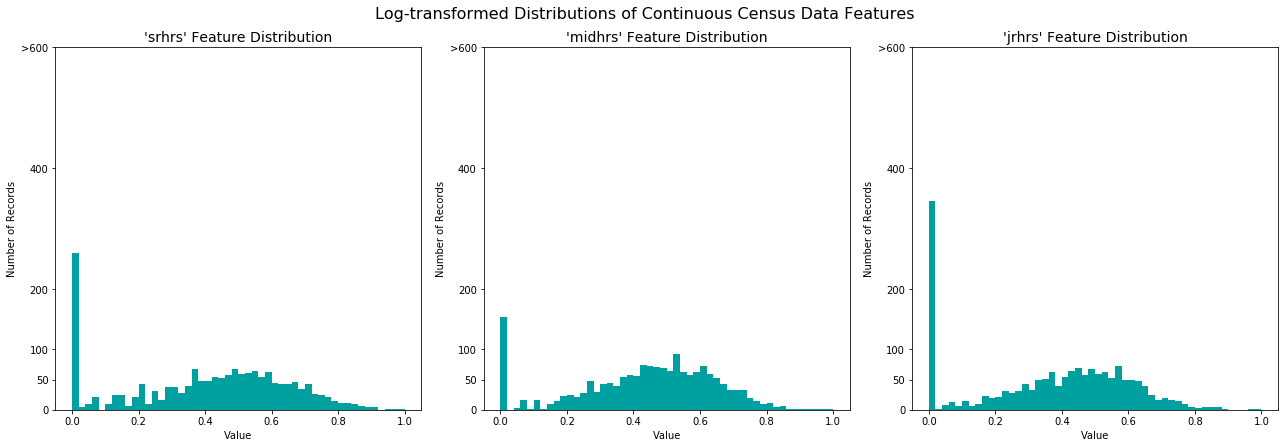

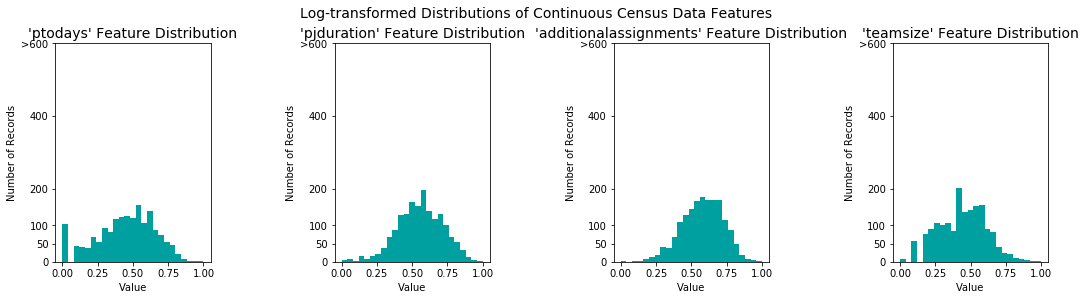

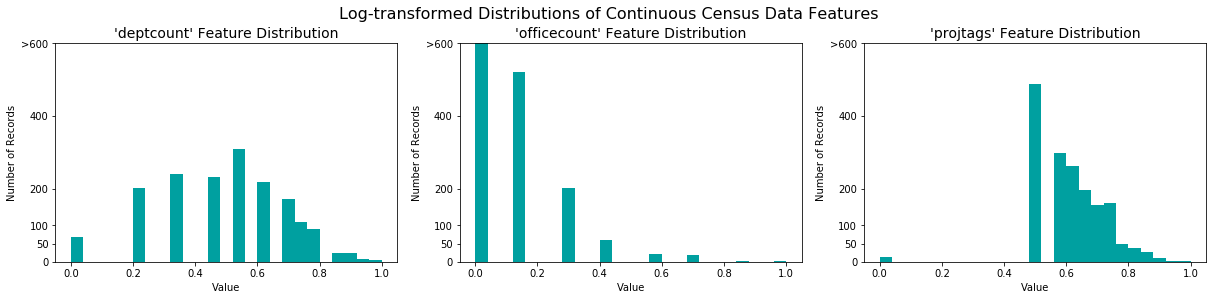

In [12]:
# Visualize the new log distributions
distribution(features_raw, transformed = True)

# Visualize the new log distributions
distribution2(features_raw, transformed = True)

# Visualize the new log distributions
distribution3(features_raw, transformed = True)

#### Step 7 - Split the data into Training and Test set

In [13]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, overbudget, test_size = 0.2, random_state = 100)

# Show the results of the split
print ("Training set has {} samples",format(X_train.shape[0]))
print ("Testing set has {} samples", format(X_test.shape[0]))

Training set has {} samples 1366
Testing set has {} samples 342


C:\ProgramData\Anaconda2\envs\py35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
X_train = X_train.drop('JobCode', axis = 1)
X_test = X_test.drop('JobCode',axis=1)

In [190]:
X_train = X_train.drop(['projtags','teamsize','pjduration',],axis=1)
X_test = X_test.drop (['projtags','teamsize','pjduration'],axis=1)                        

### Evaluation model performance

For this project using Accuracy as a metric to evaluate a model performance makes the most
sense. Also using F-beta scor e that considers precision and recall will be another metric to
evaluate model performance.

Accuracy = Total number of project correctly predicted  over budget or not over budget / Total number of
project

F-beta score = 1+B^2 * precision * recall / (B^2*precision) + recall

Precision = true positives/ (true positives + false positives)

Recall = true positives/ (true positives+false negatives)

B = .5, when Beta is .5 more emphasis is placed on precision

In [15]:
import math
# TODO: Calculate accuracy
fp = 0
tp = overbdg + (n_records - overbdg)
tn = 0
fn = 0
accuracy = tp  / float(n_records)
precision = tp / float((tp + fp))
recall = tp / (tp + fn)


# TODO: Calculate F-score using the formula above for beta = 0.5
fscore = 1.25*((precision*recall)/((math.pow(.5,2)*precision)+recall))

# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))


Naive Predictor: [Accuracy score: 1.0000, F-score: 1.0000]


In [16]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end-start
            
    # TODO: Compute accuracy on the first 300 training samples
   
    results['acc_train'] = accuracy_score(predictions_train,y_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(predictions_test,y_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train,predictions_train,beta=.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=.5)
       
    # Success
    print ("%s trained on %s samples." % (format(learner.__class__.__name__), sample_size))
        
    # Return the results
    return results

In [17]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score, accuracy_score


def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (19,7))

    # Constants
    bar_width = 0.15
    colors = ['#A00000','#00A0A0','#00A000','#8C668C','#66888c','#A1C7A1','#a02a00','#e0ad6b','#b78749','#d68620','#d6c020','#84781d','#897b10']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(1):
                
                # Creative plot code
                ax[int(j/3), int(j%3)].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[int(j/3), int(j%3)].set_xticks([2.45])
                ax[int(j/3), int(j%3)].set_xticklabels(["100%"])
                #ax[int(j/1), int(j%1)].set_xticks([0.45, 1.45, 2.45])
                #ax[int(j/1), int(j%1)].set_xticklabels(["1%", "10%", "100%"])
                ax[int(j/3), int(j%3)].set_xlabel("Training Set Size")
                ax[int(j/3), int(j%3)].set_xlim((-0.1, 3.0))
                

    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()
    
    #Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.1, -.1),
              loc = 'lower left', ncol = 1,fontsize = 'x-large')
    

AdaBoostClassifier trained on 1366 samples.
SVC trained on 1366 samples.
GradientBoostingClassifier trained on 1366 samples.
MultinomialNB trained on 1366 samples.
LogisticRegression trained on 1366 samples.
DecisionTreeClassifier trained on 1366 samples.
KNeighborsClassifier trained on 1366 samples.
GaussianNB trained on 1366 samples.
SGDClassifier trained on 1366 samples.
BernoulliNB trained on 1366 samples.


C:\ProgramData\Anaconda2\envs\py35\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


RandomForestClassifier trained on 1366 samples.
ExtraTreesClassifier trained on 1366 samples.
VotingClassifier trained on 1366 samples.


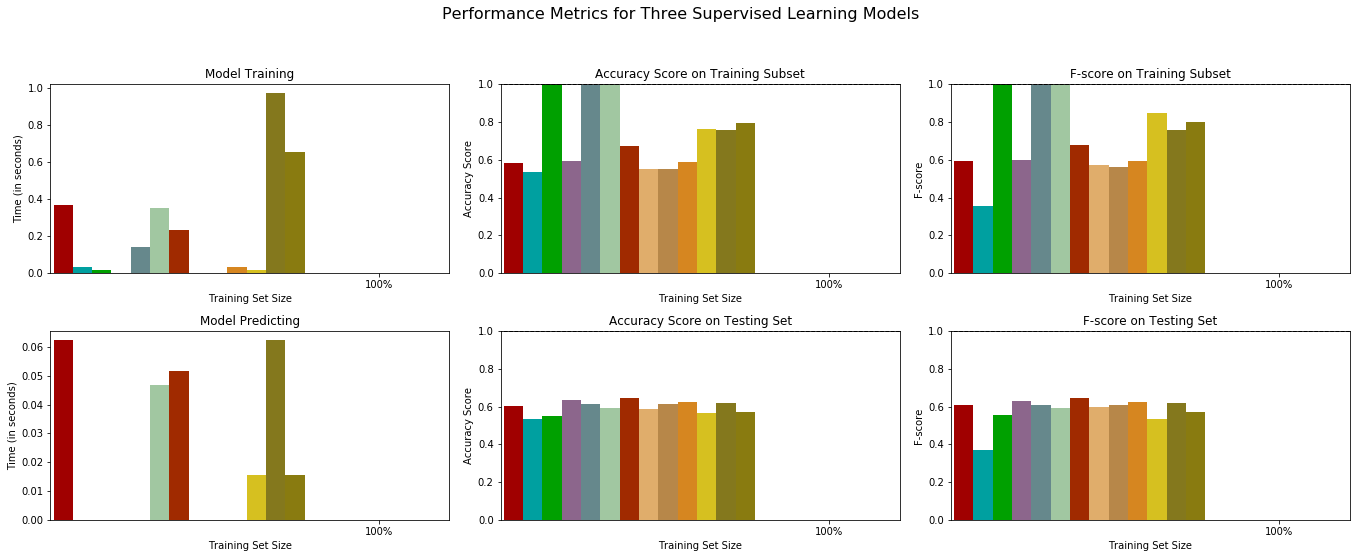

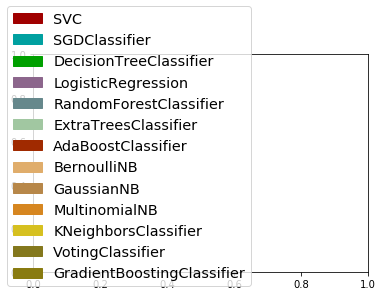

In [18]:
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier


# TODO: Initialize the three models
clf_A = ABC(n_estimators=100,random_state = 42)
clf_B = svm.SVC(kernel='rbf',probability=True,random_state = 42)
clf_C =  GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0,max_depth=1, random_state=42)
clf_D = MultinomialNB(alpha=.030)
clf_E =  LogisticRegression(random_state=42)
clf_F = tree.DecisionTreeClassifier(random_state = 42)
clf_G= KNeighborsClassifier(n_neighbors=2)
clf_H= GaussianNB()
clf_I = SGDClassifier(loss='log',penalty='l2',random_state=42,n_iter=100)
clf_J = BernoulliNB(alpha=1)
clf_K = RandomForestClassifier(n_estimators=30)
clf_L = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
eclf =  VotingClassifier(estimators=[('lr', clf_E), ('abc', clf_A), ('mnb', clf_D),('gbc',clf_C)], voting='soft')


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
#samples_1 = int(len(X_train)*0.01)
#samples_10 = int(len(X_train)*0.1)
samples_100 = int(len(X_train))

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C,clf_D,clf_E,clf_F,clf_G,clf_H,clf_I,clf_J,clf_K,clf_L,eclf]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_100]):
    #for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results, accuracy, fscore)


In [192]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU, PReLU

model = Sequential()

model.add(Dense(2000,input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(600, activation='relu'))
#model.add(Dropout(0.3))
#model.add(Dense(400, activation='relu'))
#model.add(Dropout(0.3))
#model.add(Dense(200, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(10, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='tanh'))

### TODO: Define your architecture.

model.summary()


model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint  
import h5py

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 400

### Do NOT modify the code below this line.



checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5',verbose=1, save_best_only=True)

model.fit(X_train, y_train, 
          epochs=epochs, batch_size=50, validation_split=0.2,callbacks=[checkpointer], verbose=1,shuffle=True)

model.load_weights('mnist.model.best.hdf5')

score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_140 (Dense)            (None, 2000)              16000     
_________________________________________________________________
dropout_119 (Dropout)        (None, 2000)              0         
_________________________________________________________________
dense_141 (Dense)            (None, 1500)              3001500   
_________________________________________________________________
dropout_120 (Dropout)        (None, 1500)              0         
_________________________________________________________________
dense_142 (Dense)            (None, 50)                75050     
_________________________________________________________________
dropout_121 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_143 (Dense)            (None, 25)                1275      
__________

In [19]:
for key,learner in enumerate (results.keys()):
            print (learner,'accuracy:',results[learner][0]['acc_test'],'f-score:',results[learner][0]['f_test'])
        


SVC accuracy: 0.605263157895 f-score: 0.607344632768
SGDClassifier accuracy: 0.535087719298 f-score: 0.370967741935
DecisionTreeClassifier accuracy: 0.549707602339 f-score: 0.554371002132
LogisticRegression accuracy: 0.634502923977 f-score: 0.631634819533
RandomForestClassifier accuracy: 0.611111111111 f-score: 0.608899297424
ExtraTreesClassifier accuracy: 0.593567251462 f-score: 0.593952483801
AdaBoostClassifier accuracy: 0.646198830409 f-score: 0.643851508121
BernoulliNB accuracy: 0.587719298246 f-score: 0.597199341021
GaussianNB accuracy: 0.611111111111 f-score: 0.608899297424
MultinomialNB accuracy: 0.625730994152 f-score: 0.623772102161
KNeighborsClassifier accuracy: 0.567251461988 f-score: 0.533807829181
VotingClassifier accuracy: 0.619883040936 f-score: 0.6179138322
GradientBoostingClassifier accuracy: 0.570175438596 f-score: 0.570953436807


### Feature selection

In [ ]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = pl.figure(figsize = (9,5))
    pl.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    pl.bar(np.arange(5), values, width = 0.6, align="center", color = '#00A000', \
          label = "Feature Weight")
    pl.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    pl.xticks(np.arange(5), columns)
    pl.xlim((-0.5, 4.5))
    pl.ylabel("Weight", fontsize = 12)
    pl.xlabel("Feature", fontsize = 12)
    
    pl.legend(loc = 'upper center')
    pl.tight_layout()
    pl.show()  

In [23]:
#Univariate Selection
#Below is the chi squared (chi^2) statistical test  to select 5 of the best features from the dataset

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data

kbest = SelectKBest(score_func=chi2, k=4)
kfit = kbest.fit(X_train, y_train)
# summarize scores
np.set_printoptions(precision=3)
print(kfit.scores_)
#features = fit.transform(X)
# summarize selected features
#print(features[0:5,:])




[ 1.439  8.445  1.182  0.545  1.365  1.553  0.068  0.116  0.709  0.078]


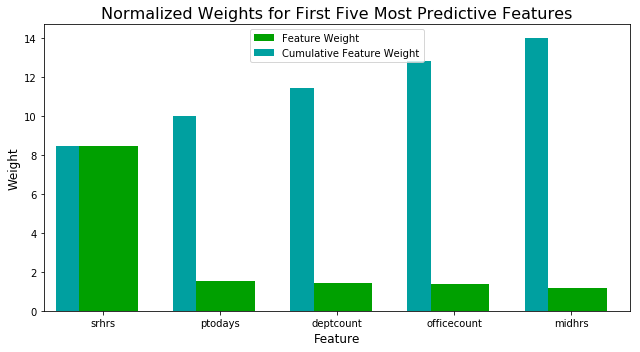

In [32]:
importances = kfit.scores_
# Plot
feature_plot(importances, X_train, y_train)

In [36]:
#Recursive Feature Elimination
#The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

# Feature Extraction with RFE
from sklearn.feature_selection import RFE

rfe = RFE(clf_E, 5)
rfefit = rfe.fit(X_train, y_train)
print("Num Features:", rfefit.n_features_)
print("Selected Features:", rfefit.support_)
print("Feature Ranking:", rfefit.ranking_)


Num Features: 5
Selected Features: [False  True False False False  True  True  True  True False]
Feature Ranking: [2 1 4 3 5 1 1 1 1 6]


Based on the ranking feature importance is 
 - SrHrs
 - Teamsize
 - Additionalassignments
 - Pjduration
 - Ptodays

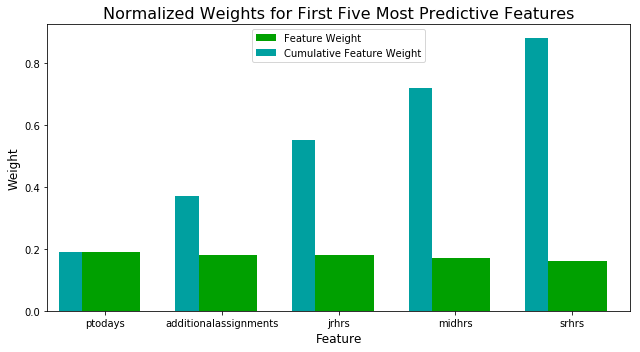

In [194]:
#feature importance

importances = clf_A.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)

In [184]:
 

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf_reduced = clf_A.fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf_A.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print ("Accuracy on testing data:",format(accuracy_score(y_test, reduced_predictions)))
print ("F-score on testing data:",format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Accuracy on testing data: 0.6052631578947368
F-score on testing data: 0.6028368794326241
